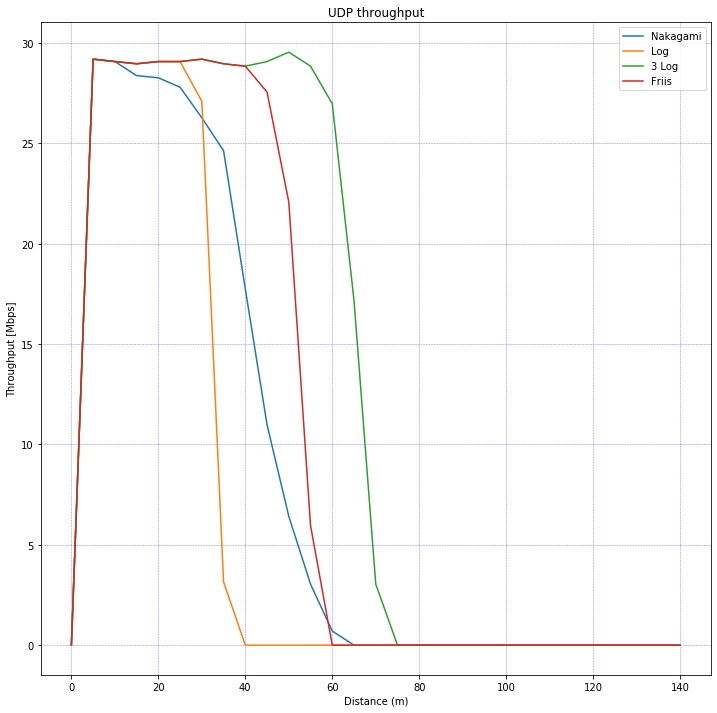

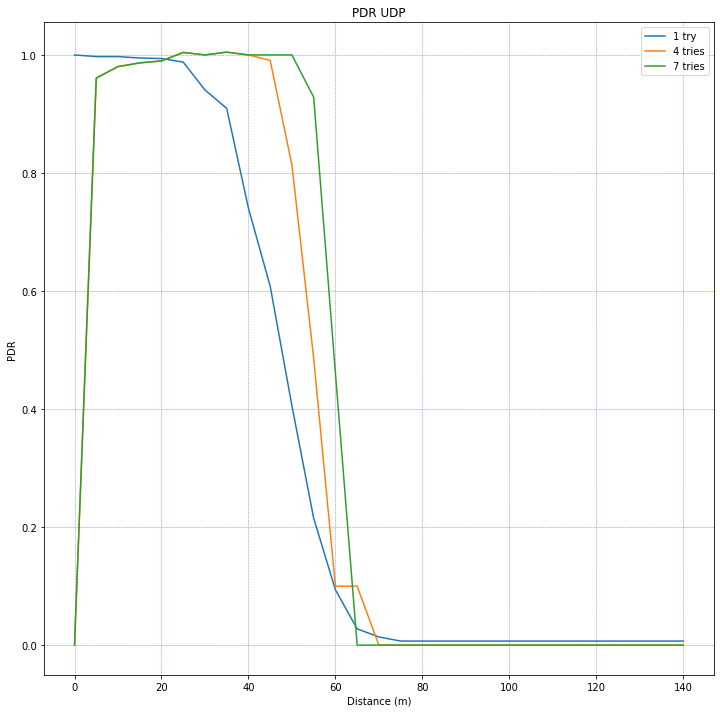

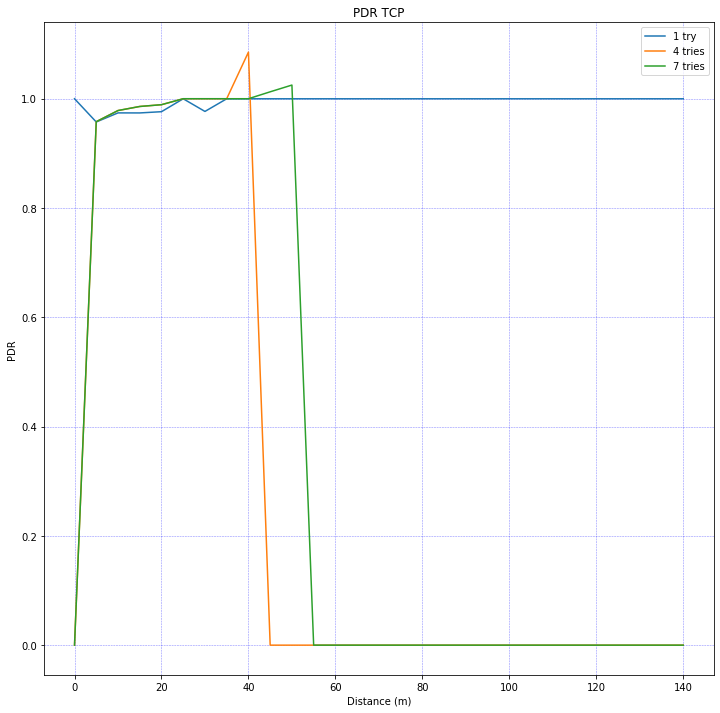

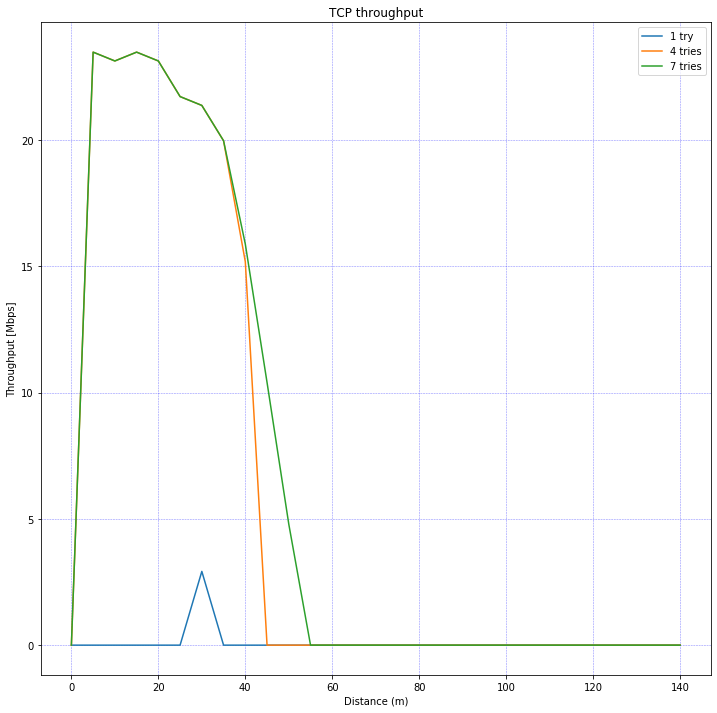

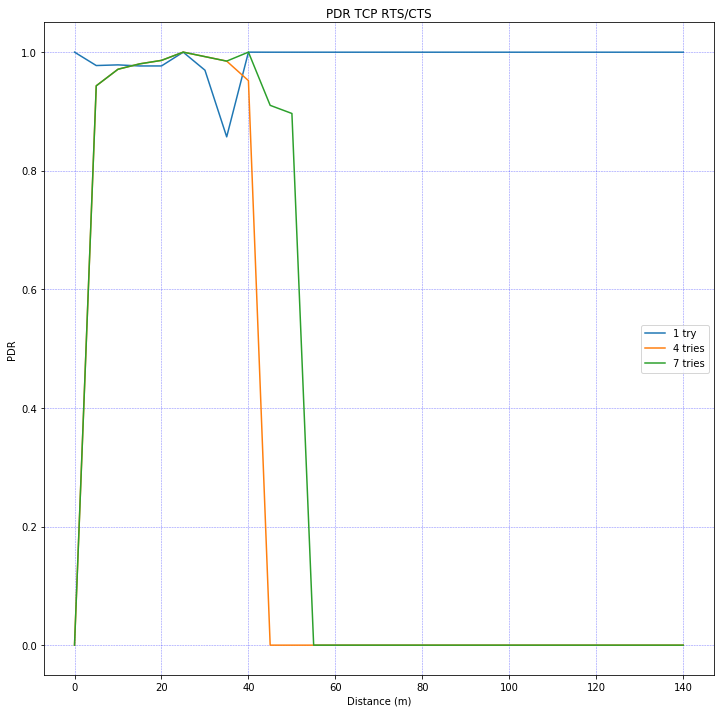

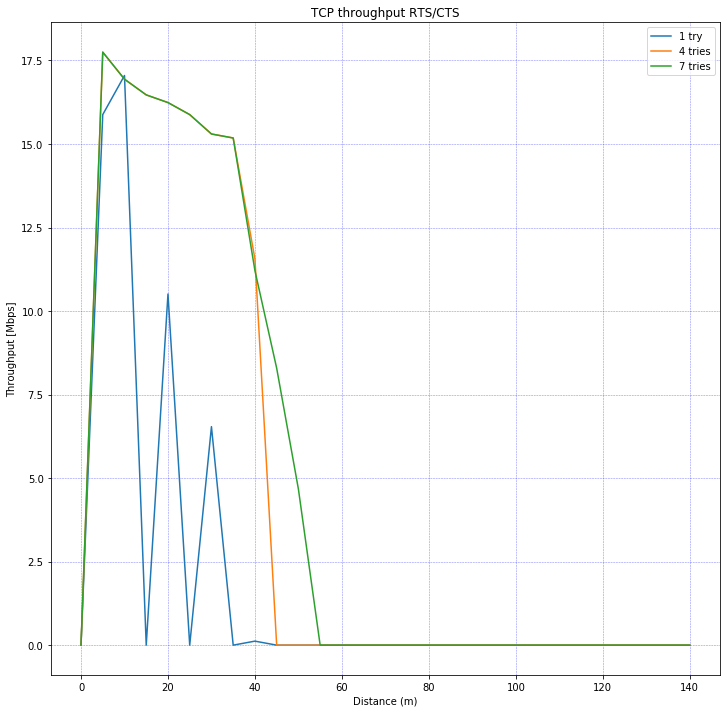

In [9]:
import copy
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
 
DATA_FILE_NAKAGAMI = '/home/student/ns-3-dev/nakagami.txt'
DATA_FILE_LOG = '/home/student/ns-3-dev/log.txt'
DATA_FILE_LOG3 = '/home/student/ns-3-dev/log3.txt'
DATA_FILE_FRIIS = '/home/student/ns-3-dev/friis.txt'

DATA_FILE_UDP_RETRIES_1 = '/home/student/ns-3-dev/udp_tries_1.txt'
DATA_FILE_UDP_RETRIES_4 = '/home/student/ns-3-dev/udp_tries_4.txt'
DATA_FILE_UDP_RETRIES_7 = '/home/student/ns-3-dev/udp_tries_7.txt'

DATA_FILE_TCP_RETRIES_1 = '/home/student/ns-3-dev/tcp_tries_1.txt'
DATA_FILE_TCP_RETRIES_4 = '/home/student/ns-3-dev/tcp_tries_4.txt'
DATA_FILE_TCP_RETRIES_7 = '/home/student/ns-3-dev/tcp_tries_7.txt'

DATA_FILE_TCP_RTS_RETRIES_1 = '/home/student/ns-3-dev/tcp_tries_rts_1.txt'
DATA_FILE_TCP_RTS_RETRIES_4 = '/home/student/ns-3-dev/tcp_tries_rts_4.txt'
DATA_FILE_TCP_RTS_RETRIES_7 = '/home/student/ns-3-dev/tcp_tries_rts_7.txt'

columns = ['distance', 'throughput']
udp_pdr_columns = ['distance', 'tx', 'rx']
tcp_pdr_columns = ['distance', 'throughput', 'tx', 'rx']


sim_data_nakagami = np.genfromtxt(DATA_FILE_NAKAGAMI, delimiter=' ', names=columns, dtype=None)
sim_data_log = np.genfromtxt(DATA_FILE_LOG, delimiter=' ', names=columns, dtype=None)
sim_data_log3 = np.genfromtxt(DATA_FILE_LOG3, delimiter=' ', names=columns, dtype=None)
sim_data_friis = np.genfromtxt(DATA_FILE_FRIIS, delimiter=' ', names=columns, dtype=None)

sim_data_udp_tries_1 = np.genfromtxt(DATA_FILE_UDP_RETRIES_1, delimiter=' ', names=udp_pdr_columns, dtype=None)
sim_data_udp_tries_4 = np.genfromtxt(DATA_FILE_UDP_RETRIES_4, delimiter=' ', names=udp_pdr_columns, dtype=None)
sim_data_udp_tries_7 = np.genfromtxt(DATA_FILE_UDP_RETRIES_7, delimiter=' ', names=udp_pdr_columns, dtype=None)

sim_data_tcp_tries_1 = np.genfromtxt(DATA_FILE_TCP_RETRIES_1, delimiter=' ', names=tcp_pdr_columns, dtype=None)
sim_data_tcp_tries_4 = np.genfromtxt(DATA_FILE_TCP_RETRIES_4, delimiter=' ', names=tcp_pdr_columns, dtype=None)
sim_data_tcp_tries_7 = np.genfromtxt(DATA_FILE_TCP_RETRIES_7, delimiter=' ', names=tcp_pdr_columns, dtype=None)

sim_data_tcp_tries_rts_1 = np.genfromtxt(DATA_FILE_TCP_RTS_RETRIES_1, delimiter=' ', names=tcp_pdr_columns, dtype=None)
sim_data_tcp_tries_rts_4 = np.genfromtxt(DATA_FILE_TCP_RTS_RETRIES_4, delimiter=' ', names=tcp_pdr_columns, dtype=None)
sim_data_tcp_tries_rts_7 = np.genfromtxt(DATA_FILE_TCP_RTS_RETRIES_7, delimiter=' ', names=tcp_pdr_columns, dtype=None)


def plot_throughput_udp(sim_data_nakagami, sim_data_log, sim_data_log3, sim_data_friis):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    plt.xlabel('Distance (m)')
    plt.ylabel('Throughput [Mbps]')
    plt.title('UDP throughput')
 
    ax.plot(sim_data_nakagami['distance'][::10], sim_data_nakagami['throughput'][::10], label='Nakagami')
    ax.plot(sim_data_log['distance'][::10], sim_data_log['throughput'][::10], label='Log')
    ax.plot(sim_data_log3['distance'][::10], sim_data_log3['throughput'][::10], label='3 Log')
    ax.plot(sim_data_friis['distance'][::10], sim_data_friis['throughput'][::10], label='Friis')
    
    ax.legend()
    plt.savefig('throughput_distance_evolution_models.png')
    plt.show()
 
def plot_pdr_udp_nakagami(sim_data_udp_tries_1, sim_data_udp_tries_4, sim_data_udp_tries_7):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    plt.xlabel('Distance (m)')
    plt.ylabel('PDR')
    plt.title('PDR UDP')
 
    pdr_1_try = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_udp_tries_1['rx'][::10], sim_data_udp_tries_1['tx'][::10])]
    pdr_4_tries = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_udp_tries_4['rx'][::10], sim_data_udp_tries_4['tx'][::10])]
    pdr_7_tries = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_udp_tries_7['rx'][::10], sim_data_udp_tries_7['tx'][::10])]

    ax.plot(sim_data_udp_tries_1['distance'][::10], pdr_1_try, label='1 try')
    ax.plot(sim_data_udp_tries_4['distance'][::10], pdr_4_tries, label='4 tries')
    ax.plot(sim_data_udp_tries_7['distance'][::10], pdr_7_tries, label='7 tries')
    
    ax.legend()
    plt.savefig('pdr_udp.png')
    plt.show()

def plot_pdr_tcp_nakagami(sim_data_tcp_tries_1, sim_data_tcp_tries_4, sim_data_tcp_tries_7):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    plt.xlabel('Distance (m)')
    plt.ylabel('PDR')
    plt.title('PDR TCP')
 
    pdr_1_try = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_tcp_tries_1['rx'][::10], sim_data_tcp_tries_1['tx'][::10])]
    pdr_4_tries = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_tcp_tries_4['rx'][::10], sim_data_tcp_tries_4['tx'][::10])]
    pdr_7_tries = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_tcp_tries_7['rx'][::10], sim_data_tcp_tries_7['tx'][::10])]

    ax.plot(sim_data_tcp_tries_1['distance'][::10], pdr_1_try, label='1 try')
    ax.plot(sim_data_tcp_tries_4['distance'][::10], pdr_4_tries, label='4 tries')
    ax.plot(sim_data_tcp_tries_7['distance'][::10], pdr_7_tries, label='7 tries')
    
    ax.legend()
    plt.savefig('pdr_tcp.png')
    plt.show()

def plot_throughput_tcp(sim_data_tcp_tries_1, sim_data_tcp_tries_4, sim_data_tcp_tries_7):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    plt.xlabel('Distance (m)')
    plt.ylabel('Throughput [Mbps]')
    plt.title('TCP throughput')
 
    ax.plot(sim_data_tcp_tries_1['distance'][::10], sim_data_tcp_tries_1['throughput'][::10], label='1 try')
    ax.plot(sim_data_tcp_tries_4['distance'][::10], sim_data_tcp_tries_4['throughput'][::10], label='4 tries')
    ax.plot(sim_data_tcp_tries_7['distance'][::10], sim_data_tcp_tries_7['throughput'][::10], label='7 tries')
    
    ax.legend()
    plt.savefig('tcp_tput.png')
    plt.show()


def plot_pdr_tcp_rts_nakagami(sim_data_tcp_tries_rts_1, sim_data_tcp_tries_rts_4, sim_data_tcp_tries_rts_7):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    plt.xlabel('Distance (m)')
    plt.ylabel('PDR')
    plt.title('PDR TCP RTS/CTS')
 
    pdr_1_try = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_tcp_tries_rts_1['rx'][::10], sim_data_tcp_tries_rts_1['tx'][::10])]
    pdr_4_tries = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_tcp_tries_rts_4['rx'][::10], sim_data_tcp_tries_rts_4['tx'][::10])]
    pdr_7_tries = [rx / (tx + 0.0001) for rx, tx in zip(sim_data_tcp_tries_rts_7['rx'][::10], sim_data_tcp_tries_rts_7['tx'][::10])]

    ax.plot(sim_data_tcp_tries_rts_1['distance'][::10], pdr_1_try, label='1 try')
    ax.plot(sim_data_tcp_tries_rts_4['distance'][::10], pdr_4_tries, label='4 tries')
    ax.plot(sim_data_tcp_tries_rts_7['distance'][::10], pdr_7_tries, label='7 tries')
    
    ax.legend()
    plt.savefig('pdr_tcp_rts_cts.png')
    plt.show()

def plot_throughput_tcp_rts(sim_data_tcp_tries_rts_1, sim_data_tcp_tries_rts_4, sim_data_tcp_tries_rts_7):
    fig, ax = plt.subplots(figsize=(12,12))
    
    ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
    plt.xlabel('Distance (m)')
    plt.ylabel('Throughput [Mbps]')
    plt.title('TCP throughput RTS/CTS')
 
    ax.plot(sim_data_tcp_tries_rts_1['distance'][::10], sim_data_tcp_tries_rts_1['throughput'][::10], label='1 try')
    ax.plot(sim_data_tcp_tries_rts_4['distance'][::10], sim_data_tcp_tries_rts_4['throughput'][::10], label='4 tries')
    ax.plot(sim_data_tcp_tries_rts_7['distance'][::10], sim_data_tcp_tries_rts_7['throughput'][::10], label='7 tries')
    
    ax.legend()
    plt.savefig('tcp_tput_rts.png')
    plt.show()

if __name__ == '__main__':
    plot_throughput_udp(sim_data_nakagami, sim_data_log, sim_data_log3, sim_data_friis)
    plot_pdr_udp_nakagami(sim_data_udp_tries_1, sim_data_udp_tries_4, sim_data_udp_tries_7)
    plot_pdr_tcp_nakagami(sim_data_tcp_tries_1, sim_data_tcp_tries_4, sim_data_tcp_tries_7)
    plot_throughput_tcp(sim_data_tcp_tries_1, sim_data_tcp_tries_4, sim_data_tcp_tries_7)
    plot_pdr_tcp_rts_nakagami(sim_data_tcp_tries_rts_1, sim_data_tcp_tries_rts_4, sim_data_tcp_tries_rts_7)
    plot_throughput_tcp_rts(sim_data_tcp_tries_rts_1, sim_data_tcp_tries_rts_4, sim_data_tcp_tries_rts_7)